In [1]:
import numpy as np
import mcfit
import matplotlib.pyplot as plt

In [2]:
from mcfit import DoubleSphericalBessel

## Validating $w_{\ell}$ with mcfit
The integral that i want to compute with mcfit is the good old projected matter density: $$w_{\ell}(\chi_1,\chi_2)=\int_0^{\infty} k^2 P(k, \chi_1, \chi_2) j_{\ell}(k\chi_1)j_{\ell}(k\chi_2)$$
(with different k factors based on the tracers considered).
- mcfit uses the FFTlog algorithm

mcfit's DoubleSphericalBessel computes this integral: $$G(y_1; \alpha) \equiv G(y_1, y_2=\alpha y_1) = \int_0^\infty F(x) j_{\nu_1}(xy_1) j_{\nu_2}(xy_2) x^2 d x $$

In [3]:
kmax = 200/13 
kmin = 2.5/7000
x = np.logspace(np.log10(kmin), np.log10(kmax), num = 40000, endpoint = False)

In [36]:
S = DoubleSphericalBessel(x, alpha=1, lowring=True, nu =2.)

In [37]:
def TGA(x, ωb, ωm):
    y = x / (ωm - ωb)
    return (1 + 56.4933 * y**1.48261 + 3559.23 * y**3.76407 + 4982.44 * y**5.68246 + 374.167 * y**7.14558)**(-0.25)

def Pk(x, ωb=0.15, ωm=0.02, ns=0.96):
    return x**ns * TGA(x, ωm, ωb)**2

In [51]:
def f_test(x):
    return np.exp(x)

In [52]:
y, G = S(f_test(x), extrap=True)

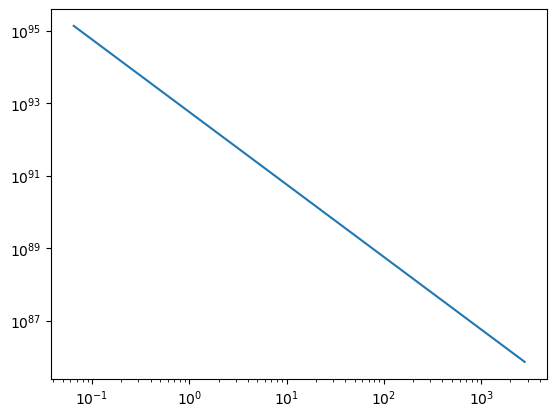

In [53]:
plt.loglog(y, G)